In [1]:
import numpy as np
import scipy.linalg

## HW1
The State can be visually seen in the following diagram.

![State Diagram](HW1\StateDiagram.JPG)


In [18]:
states = {0:'Sunny', 1:'Cloudy', 2:'Rainy'}   # Create a Dictionary with the states
A = np.array([[0.8,0.2,0],[0.4,0.4,0.2],[0.2,0.6,0.2]])   # A is the Transition matrix
A

array([[0.8, 0.2, 0. ],
       [0.4, 0.4, 0.2],
       [0.2, 0.6, 0.2]])

2(b) Write up a general purpose simulator for the state transition matrix

- The code below prints the output of the simulator after each state for the number of steps defined by variable n.


In [8]:
n = 30   # No. of iterations
start_state  = np.random.randint(3)   # Randomaly select start state
curr_state = start_state
print(f"{states[curr_state]} --> ", end="")   # Print first state

while n>0:
    curr_state = np.random.choice([0, 1, 2], p=A[curr_state])   # Set current state randomly based on the probabilities provieded in the Transition Matrix.
    print(f"{states[curr_state]} --> ", end="")   # Print current state
    n = n-1
print('END')



Cloudy --> Cloudy --> Sunny --> Cloudy --> Cloudy --> Sunny --> Cloudy --> Cloudy --> Cloudy --> Rainy --> Sunny --> Cloudy --> Sunny --> Cloudy --> Cloudy --> Rainy --> Cloudy --> Cloudy --> Sunny --> Sunny --> Sunny --> Sunny --> Sunny --> Sunny --> Cloudy --> Sunny --> Sunny --> Sunny --> Sunny --> Sunny --> Sunny --> END


Extra Test code!

In [4]:
# Sunny  = 9/14 = 0.6428571428571429
# Cloudy = 2/7  = 0.2857142857142857
# Rainy  = 1/14 = 0.0714285714285714

steps = 10**6
# start_state = 0
# curr_state = start_state
# pi = np.array([0, 0, 0])
# pi[start_state] = 1

# i = 0
pi2 = np.array([[0,0,0], [0,0,0], [0,0,0]])
for j in range(0,3):
    start_state = 0
    curr_state = start_state
    pi = np.array([0, 0, 0])
    pi[start_state] = 1
    i = 0
    while i<steps:
        curr_state = np.random.choice([0,1,2], p=A[curr_state])
        pi[curr_state]+=1
        i +=1
    pi2[j] = pi
    print("π = ", pi/steps)

column_averages = np.mean(pi2, axis=0)

print("Average of each column:")
print(column_averages/steps)


π =  [0.641779 0.286212 0.07201 ]
π =  [0.642586 0.285819 0.071596]
π =  [0.640875 0.287367 0.071759]
Average of each column:
[0.64174667 0.286466   0.07178833]


Extra Test code!

In [6]:
steps = 10**5
start_state = 0
curr_state = start_state
pi = np.array([0, 0, 0])
pi[start_state] = 1
temp_pi = np.array([0, 0, 0])
i = 0
while i<steps:
    if pi[0]!=0:
        temp_pi = pi/i
    curr_state = np.random.choice([0,1,2], p=A[curr_state])
    pi[curr_state]+=1
    i +=1
    # print(temp_pi,pi)
    if temp_pi[0] == pi[0]/i:
        break

print(i)
print("π = ", pi/steps, temp_pi)

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_24648\1477613802.py:10: RuntimeWarning: divide by zero encountered in divide
  temp_pi = pi/i
C:\Users\ROHIT\AppData\Local\Temp\ipykernel_24648\1477613802.py:10: RuntimeWarning: invalid value encountered in divide
  temp_pi = pi/i


100000
π =  [0.64607 0.28324 0.0707 ] [0.64607646 0.28324283 0.07069071]


Extra Test code!

In [11]:
# Sunny  = 9/14 = 0.6428571428571429
# Cloudy = 2/7  = 0.2857142857142857
# Rainy  = 1/14 = 0.0714285714285714

iterrations = 100   # No. of simulations
steps = 5000   # No. of Days or iterrations

Avg_pi = np.zeros(3)

for _ in range(iterrations):
    start_state = 0
    curr_state = start_state
    pi = np.array([0, 0, 0])
    pi[start_state] = 1

    for _ in range(steps):
        curr_state = np.random.choice([0, 1, 2], p=A[curr_state])
        pi[curr_state] += 1
    Avg_pi += pi / steps

Avg_pi /= iterrations

print(f"Stationary Distribution : {Avg_pi}")


Stationary Distribution : [0.641326 0.28672  0.072154]


(c) Use your simulator to determine the stationary distribution of this Markov chain. In particular I would like everyone to address (i) How you initialize the simulation (ii) How many transitions you consider before taking a result and (iii) How many simulation runs you conducted to arrive at the statistics for the stationary distribution.
- To determine the stationary distribution, I have assigned the start state to a variable and the start state is determined randomly using the numpy random function. Selecting a random start state will help remove biases caused due to the start state. 
- It can be seen in the graph that the values for the standard distribution more or less converge after 2000 to 3000 iterations.
- That being said, the percent difference graph shows that the difference reduces after 6000 to 7000 iterations. 
- The stationary distribution is equal to the actual value only upto the 2nd decimal place. In order to increase the accuracy, I ran the simulator for 1000000 iterations.


Average of each column:
[0.66133451 0.27113659 0.06850765]
[0.66043223 0.27185429 0.06791464]


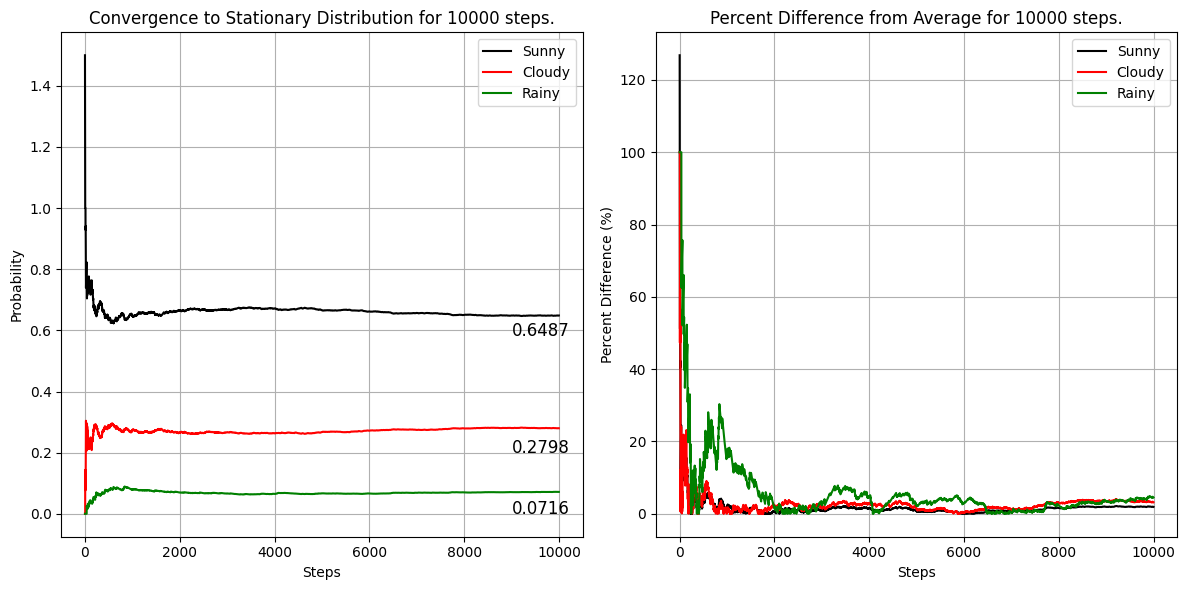

In [78]:
# Sunny  = 9/14 = 0.6428571428571429
# Cloudy = 2/7  = 0.2857142857142857
# Rainy  = 1/14 = 0.0714285714285714

steps = 10000

pi_values = np.zeros((steps, 3))

for j in range(0, 3):
    start_state = 0
    curr_state = start_state
    pi = np.array([0, 0, 0])
    pi[start_state] = 1
    i = 0
    while i < steps:
        curr_state = np.random.choice([0, 1, 2], p=A[curr_state])
        pi[curr_state] += 1
        pi_values[i] = pi / (i + 1)  # Store the normalized pi values at each step
        i += 1


column_averages1 = np.mean(pi_values[2000:], axis=0)
column_averages = np.mean(pi_values, axis=0)

percent_difference = np.zeros((steps, 3))
for i in range(steps):
    percent_difference[i] = 100 * np.abs(pi_values[i] - column_averages) / column_averages


print(f"Average of each column: {column_averages}")   # Calculates the overall avg.
print(f"Average of each column (excluding the first 2000 values): {column_averages1}")   # Calculates the avg excluding the first 2000 values.


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(pi_values[1:, 0], label='Sunny', color = 'black')
plt.plot(pi_values[1:, 1], label='Cloudy', color = 'red')
plt.plot(pi_values[1:, 2], label='Rainy', color = 'green')
plt.xlabel('Steps')
plt.ylabel('Probability')
plt.title(f'Convergence to Stationary Distribution for {steps} steps.')
plt.annotate(pi[0]/steps,
            xy=(steps-(steps/10), 0.58),
            fontsize=12)
plt.annotate(pi[1]/steps,
            xy=(steps-(steps/10), 0.2),
            fontsize=12)
plt.annotate(pi[2]/steps,
            xy=(steps-(steps/10), 0),
            fontsize=12)
plt.legend()
plt.grid(True)



plt.subplot(1, 2, 2)
plt.plot(percent_difference[1:, 0], label='Sunny', color = 'black')
plt.plot(percent_difference[1:, 1], label='Cloudy', color = 'red')
plt.plot(percent_difference[1:, 2], label='Rainy', color = 'green')
plt.xlabel('Steps')
plt.ylabel('Percent Difference (%)')
plt.title(f'Percent Difference from Average for {steps} steps.')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#print(pi/steps)

Average of each column: [0.64166435 0.28790883 0.07054773]
Average of each column (excluding the first 2000 values): [0.64209342 0.28766139 0.0702851 ]


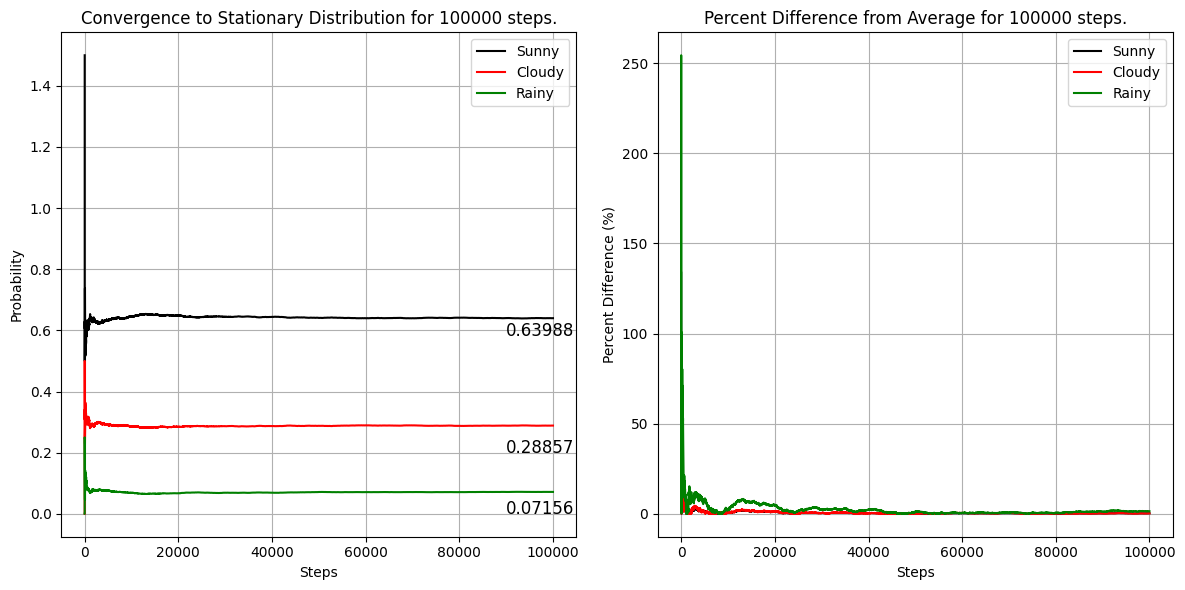

In [82]:
# Sunny  = 9/14 = 0.6428571428571429
# Cloudy = 2/7  = 0.2857142857142857
# Rainy  = 1/14 = 0.0714285714285714

steps = 100000

pi_values = np.zeros((steps, 3))

for j in range(0, 3):
    start_state = 0
    curr_state = start_state
    pi = np.array([0, 0, 0])
    pi[start_state] = 1
    i = 0
    while i < steps:
        curr_state = np.random.choice([0, 1, 2], p=A[curr_state])
        pi[curr_state] += 1
        pi_values[i] = pi / (i + 1)  # Store the normalized pi values at each step
        i += 1


column_averages1 = np.mean(pi_values[2000:], axis=0)
column_averages = np.mean(pi_values, axis=0)

percent_difference = np.zeros((steps, 3))
for i in range(steps):
    percent_difference[i] = 100 * np.abs(pi_values[i] - column_averages) / column_averages


print(f"Average of each column: {column_averages}")   # Calculates the overall avg.
print(f"Average of each column (excluding the first 2000 values): {column_averages1}")   # Calculates the avg excluding the first 2000 values.



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(pi_values[1:, 0], label='Sunny', color = 'black')
plt.plot(pi_values[1:, 1], label='Cloudy', color = 'red')
plt.plot(pi_values[1:, 2], label='Rainy', color = 'green')
plt.xlabel('Steps')
plt.ylabel('Probability')
plt.title(f'Convergence to Stationary Distribution for {steps} steps.')
plt.annotate(pi[0]/steps,
            xy=(steps-(steps/10), 0.58),
            fontsize=12)
plt.annotate(pi[1]/steps,
            xy=(steps-(steps/10), 0.2),
            fontsize=12)
plt.annotate(pi[2]/steps,
            xy=(steps-(steps/10), 0),
            fontsize=12)
plt.legend()
plt.grid(True)



plt.subplot(1, 2, 2)
plt.plot(percent_difference[1:, 0], label='Sunny', color = 'black')
plt.plot(percent_difference[1:, 1], label='Cloudy', color = 'red')
plt.plot(percent_difference[1:, 2], label='Rainy', color = 'green')
plt.xlabel('Steps')
plt.ylabel('Percent Difference (%)')
plt.title(f'Percent Difference from Average for {steps} steps.')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#print(pi/steps)

(d) The solution is derived via a closed analytical form. Can you do the diagonalization of the state matrix A with python to come up with the same result.
- Using the linear algebra library of python, I calculated the Left diagonal vector. After getting the results, the eigen vector corresponding to eigen value = 1 has to be considered.
- As the values are negative, we need to Normalize this result to get the exact closed form stationary distribution.


In [83]:
Eig_values, left_vectors = scipy.linalg.eig(A, left = True, right = False)   # Calculates the left Eigen Vectors

print(f"Left Eigen Vectors = \n {left_vectors}")
print(f"\neigen values = \n {Eig_values}")

pi = left_vectors[:,0]
normalized_pi = [(x/np.sum(pi)).real for x in pi]   # Normalizes pi
print(f"\nFinal Normalized pi = {normalized_pi}")

Left Eigen Vectors = 
 [[-0.90913729 -0.81251992  0.23258782]
 [-0.40406102  0.47596315 -0.79410449]
 [-0.10101525  0.33655677  0.56151667]]

eigen values = 
 [ 1.        +0.j  0.48284271+0.j -0.08284271+0.j]

Final Normalized pi = [0.6428571428571426, 0.28571428571428586, 0.07142857142857145]
